In [2]:
'''
谱减法 基础版
'''

import numpy as np
import librosa
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [3]:
uttid = '51874'
# uttid = '48502'

# mixture_file = f'./dataset/mixture/mixture-steadyNoise{uttid}.wav'
mixture_file = f'./dataset/mixture/mixture-unsteadyNoise{uttid}.wav'
output_file = "./dataset/estimate/estimate"+mixture_file.split("mixture")[-1]

(128000,)
(257, 1001)


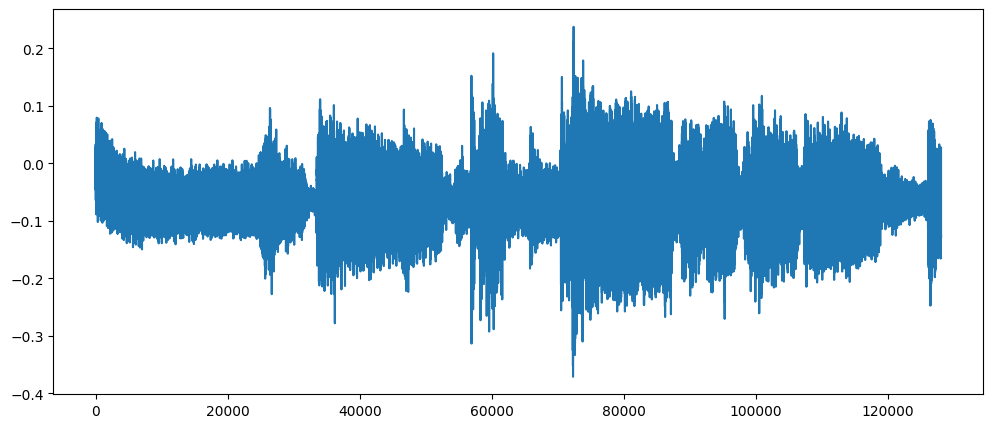

In [5]:
audio_data, sr = librosa.load(mixture_file, sr=16000)
print(audio_data.shape)
stft_audio = librosa.stft(audio_data, n_fft=512)  # 对音频信号进行短时傅里叶变换
print(stft_audio.shape)
plt.figure(figsize=(12,5))
plt.plot(audio_data)

In [18]:
# n_fft 可以自行设置 stft_audio的shape为(1+n_fft/2,n_frames) shape[0]代表frequency bin长度 shape[1]代表时间帧长度
# 可以自行参考
# http://librosa.org/doc/main/generated/librosa.stft.html
mag_audio = np.abs(stft_audio)  # 幅度谱
print(mag_audio.shape)
pha_audio = np.angle(stft_audio)  # 相位谱
print(pha_audio.shape)

(257, 1001)
(257, 1001)


(257, 1001)
(257,)


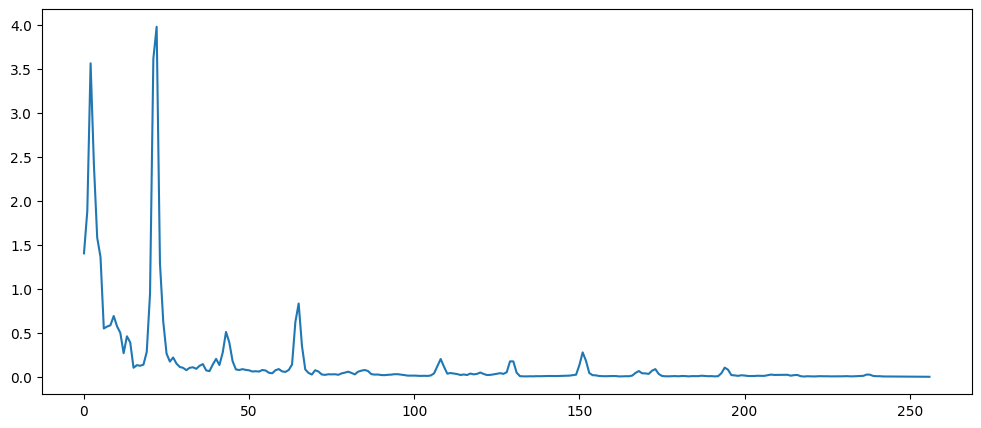

In [9]:
# 噪声幅度计算 假设前5帧为silence(noise)  也可以采用其他方式估计噪声
mag_audio = np.abs(stft_audio)  # 幅度谱
print(mag_audio.shape)
noise_mean = np.zeros((mag_audio.shape[0],))
for i in range(0, 5):
    noise_mean += mag_audio[:,i]
noise_mean /= 5  # 取平均
print(noise_mean.shape)
plt.figure(figsize=(12,5))
plt.plot(noise_mean)

(257, 1001)
(257, 1001)
(257, 1001)
(128000,)


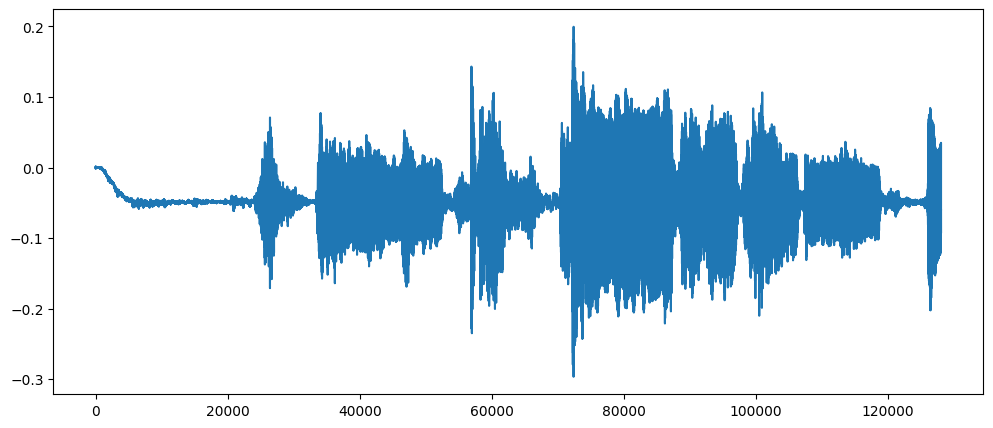

In [11]:
pha_audio = np.angle(stft_audio)  # 相位谱
print(pha_audio.shape)
for i in range(mag_audio.shape[1]):
    mag_audio[:,i] = mag_audio[:,i] - noise_mean
mag_audio_ = np.where(mag_audio > 0, mag_audio, 0)  # 大于0的部分保持不变 负数取0
print(mag_audio_.shape)
stft_audio_ = mag_audio_ * np.exp(1.0j*pha_audio)  # 利用原始相位信息进行逆傅里叶变换变换
print(stft_audio_.shape)
wav_data = librosa.istft(stft_audio_)
print(wav_data.shape)
plt.figure(figsize=(12,5))
plt.plot(wav_data)

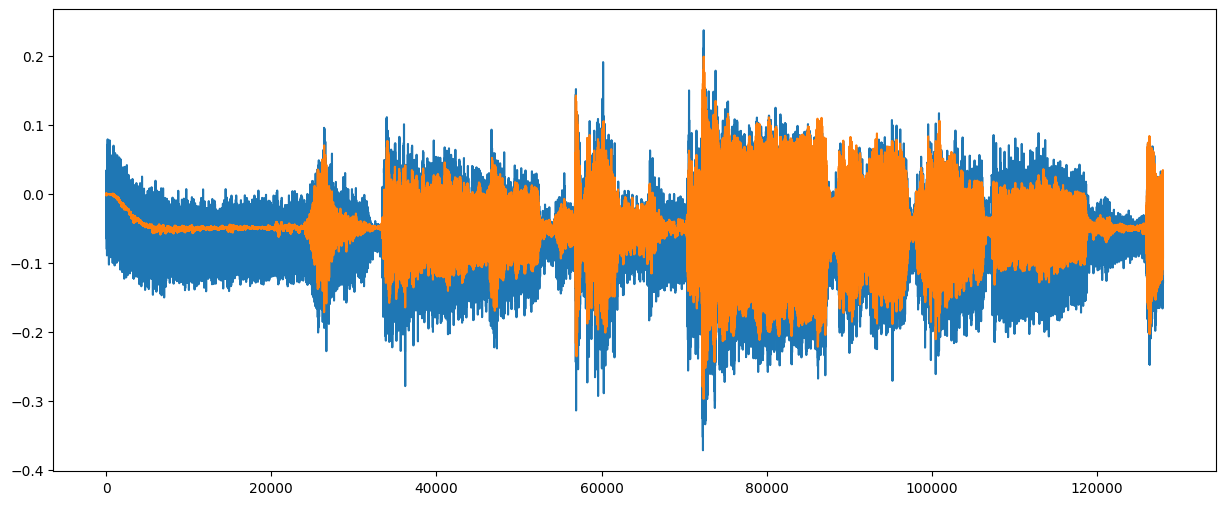

In [12]:
wavfile.write(output_file, sr, (wav_data * 32768).astype(np.int16))
plt.figure(figsize=(15, 6))
# plt.subplot(121)
plt.plot(audio_data)
# plt.subplot(122)
plt.plot(wav_data)